In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('customer_churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can see that data is imbalanced in the ratio of approx 1 : 2.7 so what can we do now well there are two really beautiful techniques that I would like to discuss here which are heavily used in data science.  



Firstly I will clean my data a little.
lets start with churn wherever the value is yes or no we can convert it to 1 or 0 respectively

In [8]:
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
df.tenure.dtypes
df[df.TotalCharges!=' '].shape
df1 = df[df.TotalCharges != ' ']

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

# Visualizing a bit
<b> It is important to have the best idea of dataset so we will be creating a small comparing graph of tenure between customers who churned vs the customers who didn't.</b>

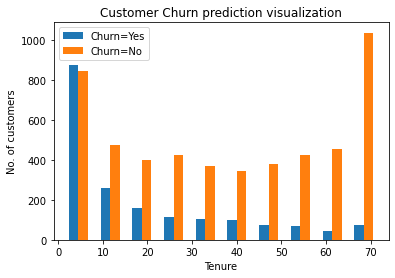

In [14]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure
plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.title("Customer Churn prediction visualization")
plt.hist([tenure_churn_yes, tenure_churn_no],rwidth = 0.6, label=['Churn=Yes','Churn=No'])
plt.legend()


Here we can see that the above company needs to focus more upon the customers who are connected with them for less than 5 Years

In [15]:
# printing distinct values of all coloumns
for col in df1:
    if df1[col].dtypes == 'object':
        print(f"{col}: {df1[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [16]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [17]:
#label yes and no to 1 and 0 respectively
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn' ]
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No': 0}, inplace = True)
    

In [18]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [19]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace=True)

In [20]:
mapping_dictionary = {'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0}  #maintaing the dictionary of our numerical mappings
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])




In [21]:
for col in df2:
    print(f"{col}: {df2[col].unique()}")

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


# Scaling 
[Why Scaling is important ?](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d)



In [22]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [23]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['TotalCharges', 'MonthlyCharges', 'tenure']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [24]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

<h3> Train Test </h3>

In [25]:
X = df2.drop('Churn',axis=1)
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

### It can be clearly seen that 0 is more dominating than 1 therefore if we will train our model right now it will be more biased towards not churning of customers

In [26]:
print(df2.Churn.value_counts())

0    5163
1    1869
Name: Churn, dtype: int64


## Major Methods to handle Imbalanced Dataset are

**1.Under Sample Majority Class <br>
2.Over Sample Minority Class using Duplication <br>
3.Over Sample Minority Class using SMOTE(Synthetic Minority Oversampling Technique) <br>
4.Ensemble Method <br>
5.Focal Loss** 



## 1. <u><span style="color:blue">Under Sample Majority Class</span></u>


In [27]:
# using under Sample technique to balance the data
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)

*<u>The NearMiss function</u><span style="font-family: Georgia, serif;"> from the imblearn.under_sampling module is a technique for undersampling the majority class in imbalanced datasets. It is designed to select a subset of samples from the majority class that are "nearest" to the minority class samples.*</span>
*The role of the NearMiss function is to reduce the imbalance between the majority and minority classes by removing instances from the majority class. It aims to ensure that the selected subset of majority class samples is representative of the overall majority class distribution while maintaining the information contained in the minority class.*

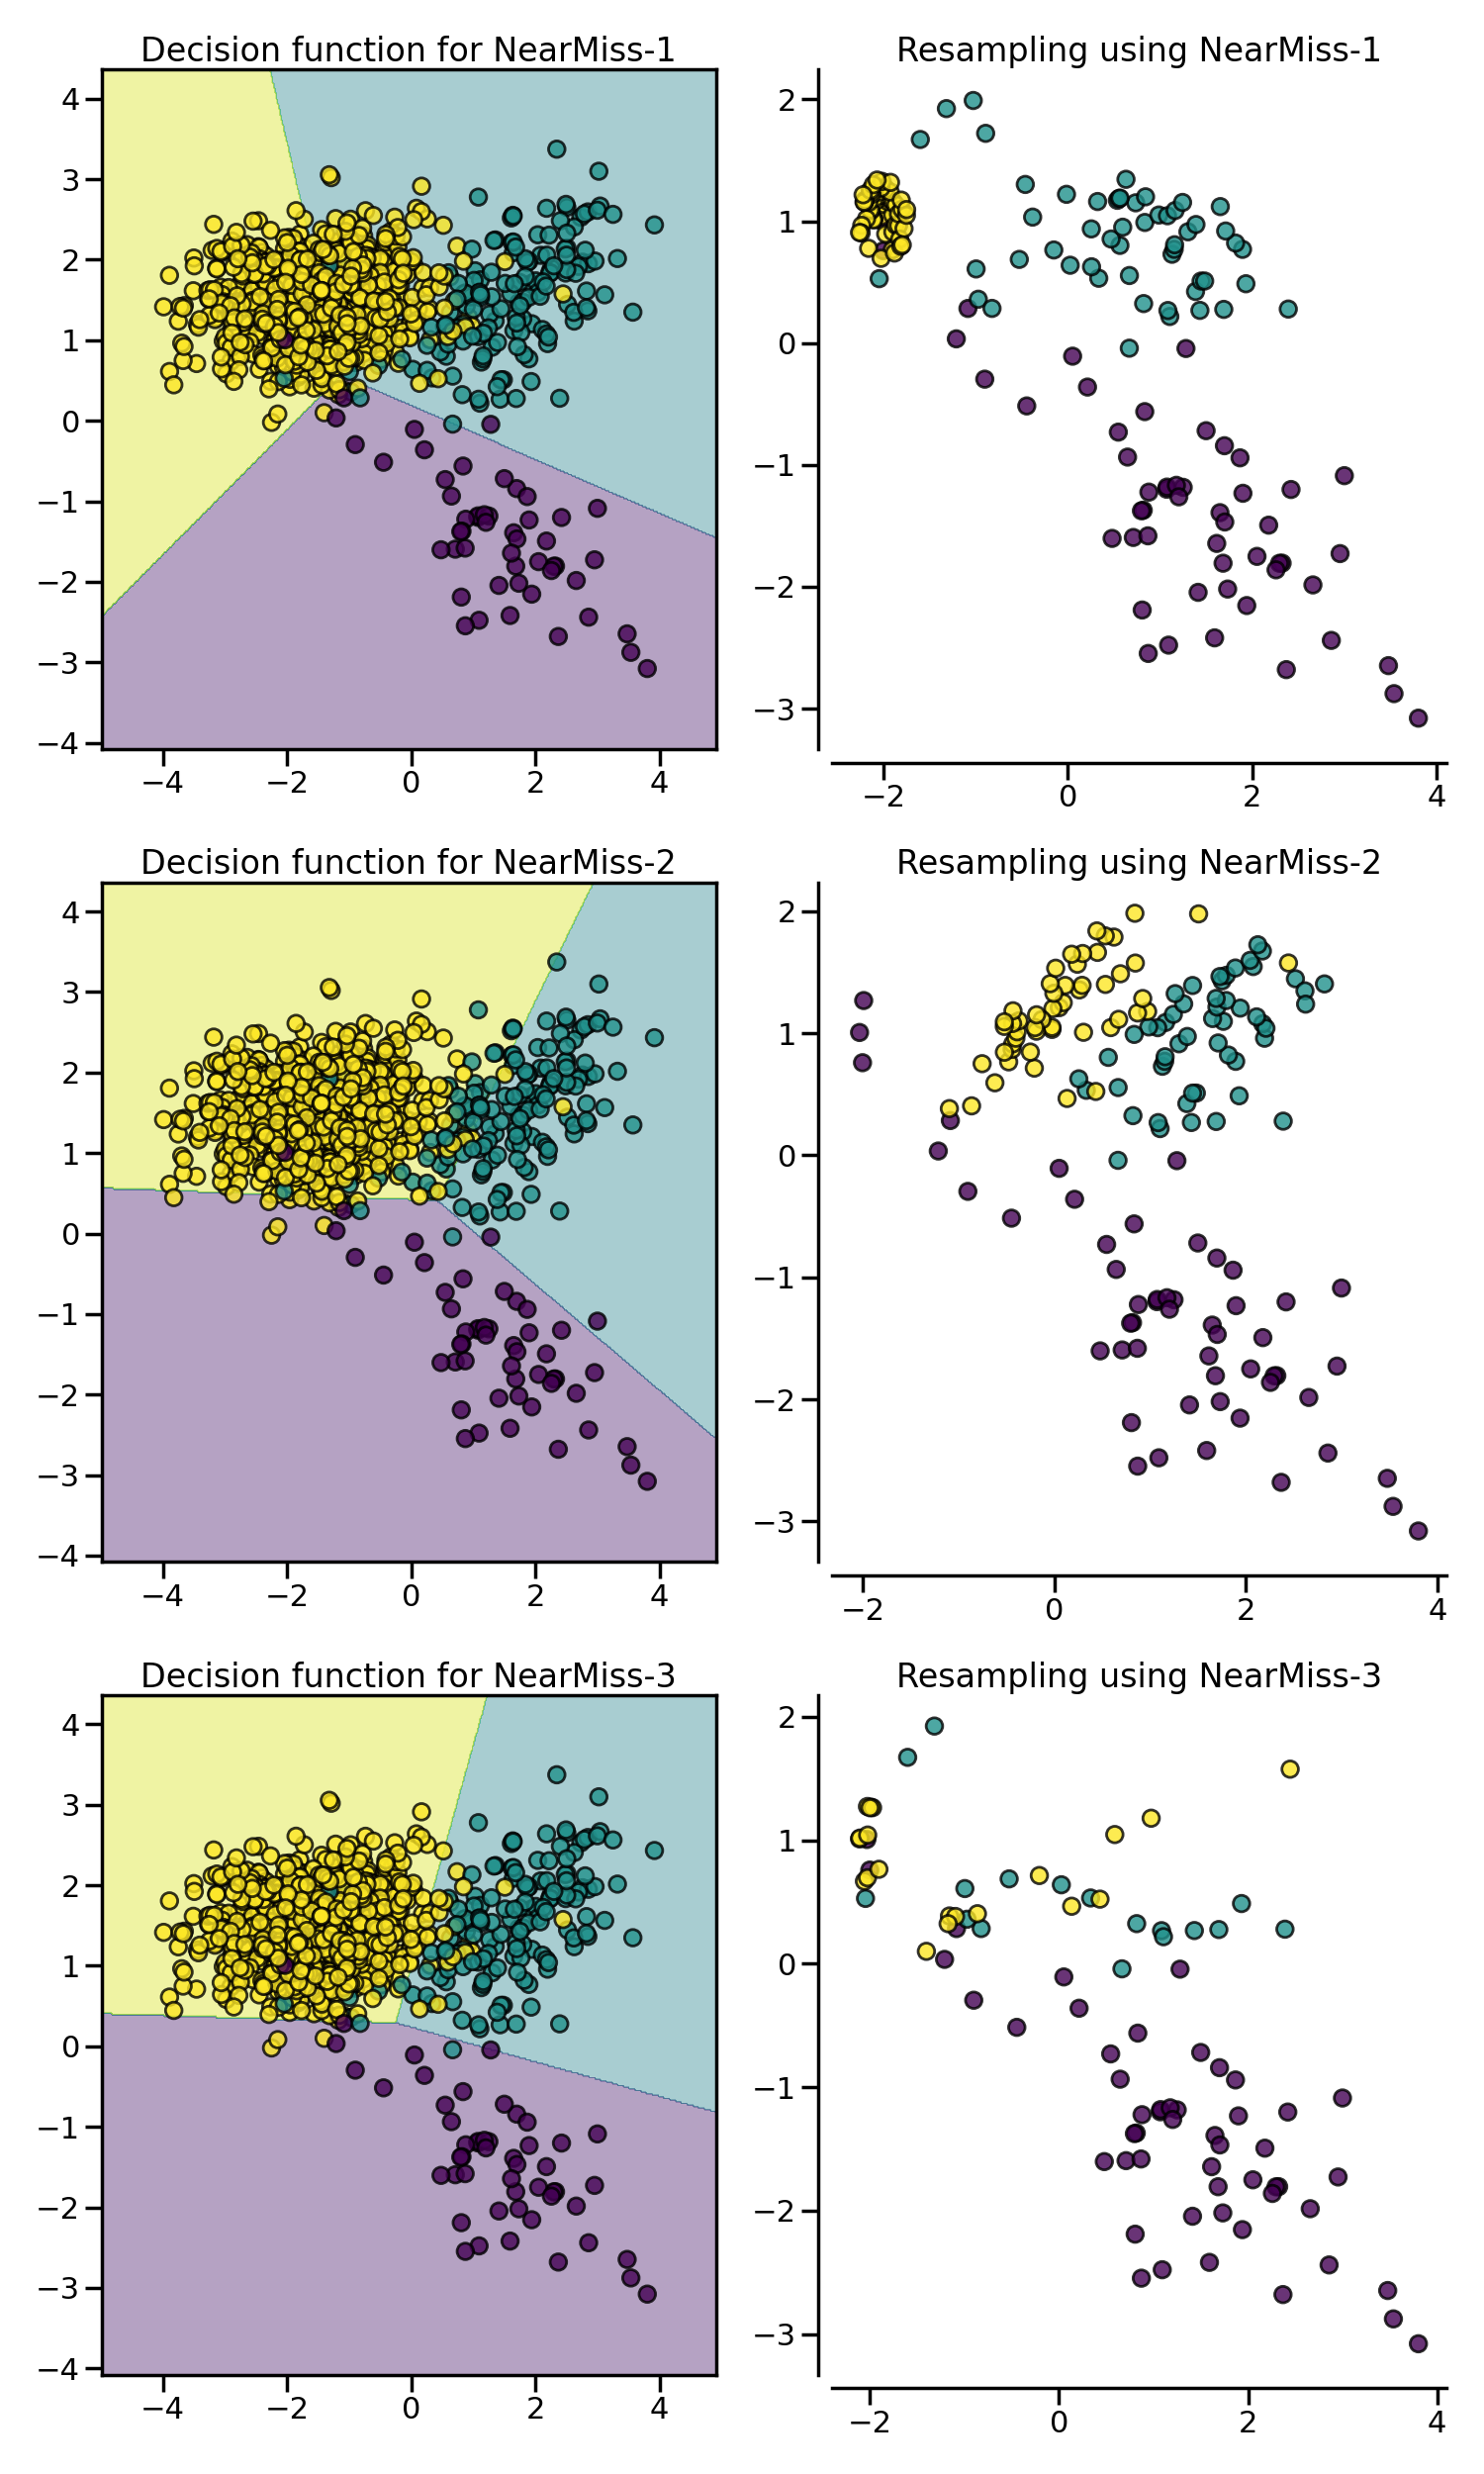


In [28]:
# checking the balanced data
print(f"The number of classes before fit {Counter(y_train)}")
print(f"The number of classes after fit {Counter(y_train_ns)}")


The number of classes before fit Counter({0.0: 4130, 1.0: 1495})
The number of classes after fit Counter({0.0: 1868, 1.0: 1495})


In [29]:
# lets train the model and check the accuracy
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_ns, y_train_ns)

# lets predict the model
y_pred = classifier.predict(X_test)

# lets check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy Score: 0.7547974413646056
Confusion Matrix: 
[[831 202]
 [143 231]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.83      1033
         1.0       0.53      0.62      0.57       374

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.75      0.76      1407



## 2. <u><span style="color:blue">Over Sample Minority Class using duplicates</span></u>

In [30]:
# lets over sample Minority class using duplicate technique

from imblearn.combine import SMOTETomek
os = SMOTETomek(0.90)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)

# checking the balanced data
print(f"The number of classes before fit {Counter(y_train)}")
print(f"The number of classes after fit {Counter(y_train_os)}")




The number of classes before fit Counter({0.0: 4130, 1.0: 1495})
The number of classes after fit Counter({0.0: 3898, 1.0: 3485})


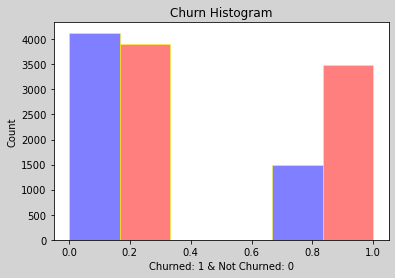

In [31]:
# plot the graph
import matplotlib.pyplot as plt

pltObj = plt.figure()
# plot histogram
plt.hist([y_train, y_train_os], color=['blue', 'red'], edgecolor='yellow', alpha=0.5, rwidth=1, label=['No', 'Yes'], bins=3, )
# Add titles and labels
plt.title('Churn Histogram')
plt.xlabel('Churned: 1 & Not Churned: 0')
plt.ylabel('Count')
# set background color
pltObj.set_facecolor('lightgrey')

plt.show()



In [32]:
# lets train the model and check the accuracy
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_os, y_train_os)

# lets predict the model
y_pred = classifier.predict(X_test)

# lets check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")



Accuracy Score: 0.7626154939587776
Confusion Matrix: 
[[799 234]
 [100 274]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      1033
         1.0       0.54      0.73      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



## 3. <u><span style="color:blue">Over Sample Minority Class using SMOTE techinque</span></u>

In [33]:
# over sample minority class using SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# checking the balanced data
print(f"The number of classes before fit {Counter(y_train)}")
print(f"The number of classes after fit {Counter(y_train_sm)}")

The number of classes before fit Counter({0.0: 4130, 1.0: 1495})
The number of classes after fit Counter({0.0: 4130, 1.0: 4130})


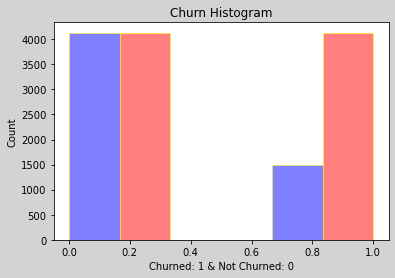

In [34]:
# plot the graph
import matplotlib.pyplot as plt

pltObj = plt.figure()
# plot histogram
plt.hist([y_train, y_train_sm], color=['blue', 'red'], edgecolor='yellow', alpha=0.5, rwidth=1, label=['No', 'Yes'], bins=3, )
# Add titles and labels
plt.title('Churn Histogram')
plt.xlabel('Churned: 1 & Not Churned: 0')
plt.ylabel('Count')

# set background color
pltObj.set_facecolor('lightgrey')


## 4. <u><span style="color:blue">Ensemble Method</span></u>

In [35]:
# ensemble technique
from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier()
easy.fit(X_train, y_train)
y_pred = easy.predict(X_test)

# lets check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")




Accuracy Score: 0.738450604122246
Confusion Matrix: 
[[744 289]
 [ 79 295]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1033
         1.0       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [36]:
# Focal Loss technique
from focal_loss import BinaryFocalLoss
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(26, input_dim=26, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=BinaryFocalLoss(gamma=2), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test)
y_pred = y_pred.round()

# lets check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")



Epoch 1/100
176/176 [==============================] - 6s 6ms/step - loss: 0.1370 - accuracy: 0.7164
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.1102 - accuracy: 0.7947
Epoch 3/100
176/176 [==============================] - 1s 7ms/step - loss: 0.1080 - accuracy: 0.8016
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.1065 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.1060 - accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 1s 7ms/step - loss: 0.1053 - accuracy: 0.8098
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.1047 - accuracy: 0.8059
Epoch 8/100
176/176 [==============================] - 1s 7ms/step - loss: 0.1041 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 1s 6ms/step - loss: 0.1040 - accuracy: 0.8116
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.1034 - accura

**What is Focal Loss:**
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  To be done yet

**Why Focal Loss : 
First of All let us try to understand how focal loss function handles imbalanced dataset instead of general cross-entropy function.** <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Focal loss basically penalizes more whenever the incorrectly predict value falls in minority class and it will penaliza less if the incorrectly predict value is from majority class.

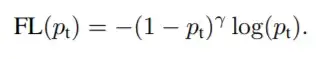

In practice we use an α-balanced variant of the focal loss:


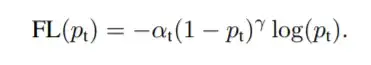


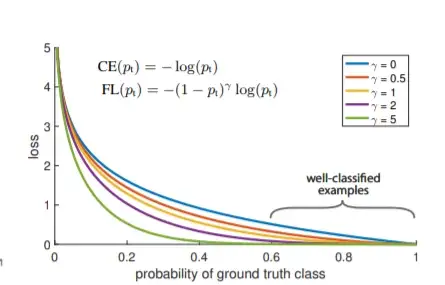

It can observed in the above graph that for higher value of gamma the loss function is down weighted for the values with high probability and almost unchanged for the values of lower probability

## Implementing Focal Loss from raw